<a href="https://colab.research.google.com/github/jear2412/MCMC/blob/master/PTHMCcaseA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

sns.set()

#PTHMC Case A


In [ ]:
def Analysis(x):
    var=np.var(x,0)

    ess=np.zeros( x.shape[1])
    for i in range( x.shape[1] ):
      ess[i]=tfp.mcmc.effective_sample_size(  x[:,i] , filter_beyond_positive_pairs=True)
    
    mess=np.min(ess)
    N=x.shape[0]
    summary= {
        "TotalObs": N,
        "Variance": var,
        "mVar": var/ess,
        "ess": ess,
        "mess":mess, #min ess
        "IAT": N/ess, 
        }
    return summary


def ClassMatrix(x, means):
    temp = np.zeros( shape=(x.shape[0], means.shape[0]) )
    #q = 9.21034 / 100
    for i in range( x.shape[0]):
        temp2=np.zeros( means.shape[0] )
        for j in range( means.shape[0] ):
            temp2[j] =np.dot( x[i] - means[j], x[i] - means[j] )
        index_min = np.argmin(temp2 )
        temp[i][index_min]=1
    return temp

#estimation of weights
def weights(x, means, size):
    #take a sample of size=size and calculate the weights
    indexes = np.random.choice( np.arange( 0, len(x) ), size=size, replace=False )
    temp=ClassMatrix(x[indexes], means)
    return np.mean(temp, 0)


def AFER( fw, tw):
    '''Average frecuency error rate 
    fw: frequency weight
    tw: true weight 
    Calculate \sum| fw-tw | '''
    return np.sum( np.abs(  fw-tw ) )
    

def fpoints(f, args, theta,  pars , lb, upb, m=100):
    '''f is the objective function to be plotted
       args are the arguments of f as a list
       theta is the vector of true parameters
       pars are the parameters to be plotted (passed as an array)
       lb: array of lower bounds
       upb: array of upper bounds
       '''
       
    xx = np.linspace(lb[0], upb[0], m)
    yy = np.linspace(lb[1], upb[1], m)
    xx, yy = np.meshgrid(xx, yy)
    Z = np.zeros(shape=[m, m])

    for i in range( m ):
        for j in range( m ):
            temp=np.array( [xx[i][j], yy[i][j]] )
            Z[i][j] = f( temp )
    return xx,yy,Z 

def pContour(xx,yy,Z,c=100):
    plt.contour( xx, yy, Z, c, colors='b' )
    plt.xlabel( r'$\theta_1$' )
    plt.ylabel( r'$\theta_2$' )
    plt.title( r'Objective Function Contours' )
    plt.show()    


# log target f(x) case a

# log target f(x)
def logf(x):
    if(x[0]>0 and x[0]>0 and x[0]<10 and x[1]<10   ):
      w = (1.0 / num_mixtures) * np.ones( num_mixtures )
      v = 1.0 / (10.0) * np.ones( num_mixtures )
      return np.log( np.sum( (w / v ** 2) * np.exp( -1.0 / (2.0 * v ** 2) * np.sum( np.square( x - mu ), 1 ) ) ) )
    else:
      return -np.inf 



In [ ]:

mu = np.array(
    [[2.18, 5.76], [8.67, 9.59], [4.24, 8.48], [8.41, 1.68], [3.93, 8.82], [3.25, 3.47], [1.70, 0.50], [4.59, 5.60],
     [6.91, 5.81], [6.87, 5.40], [5.41, 2.65], [2.70, 7.88], [4.98, 3.70], [1.14, 2.39], [8.33, 9.50], [4.93, 1.5],
     [1.83, 0.09], [2.26, 0.31], [5.54, 6.86], [1.69, 8.11]] )

num_mixtures = 20 #number of mixture components
dim = 2  # mixture of bivariate Gaussians

In [ ]:
CAdE=pd.read_csv('CAdE.csv')
CAdex=pd.read_csv('CAdex.csv')
CAdms=pd.read_csv('CAdms.csv')
CAobs=pd.read_csv('CAobs.csv')


In [ ]:
pd.DataFrame.describe(CAobs)


,Unnamed: 0,theta1,theta2,E,lp__
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,135000.500000,4.346465,4.618149,1.193919,-1.193919
std,77942.430678,2.439578,3.429399,0.946268,0.946268
min,1.000000,0.748503,-0.331054,0.226509,-11.977905
25%,67500.750000,2.130850,1.547144,0.514964,-1.576030
50%,135000.500000,4.124603,4.549631,0.911111,-0.911111
75%,202500.250000,5.620863,7.994958,1.576030,-0.514964
max,270000.000000,9.113242,9.984184,11.977905,-0.226509


In [ ]:
pd.DataFrame.median(CAobs)


Unnamed: 0    135000.500000
theta1             4.124603
theta2             4.549631
E                  0.911111
lp__              -0.911111
dtype: float64

In [ ]:
pd.DataFrame.quantile(CAobs, (0.025, 0.975))

,Unnamed: 0,theta1,theta2,E,lp__
0.025,6750.975,1.117487,0.051561,0.253686,-3.705463
0.975,263250.025,8.660988,9.612633,3.705463,-0.253686


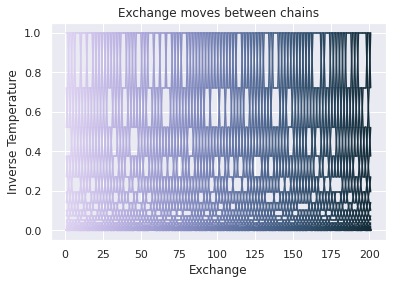

In [ ]:
ax=sns.lineplot(x="x", y="y", hue="g",data=CAdex, legend=False,  palette="ch:2.5,.25") 
ax.set(xlabel="Exchange", ylabel = "Inverse Temperature")
ax.set_title('Exchange moves between chains')
plt.savefig('PTCA1.png', dpi=500)

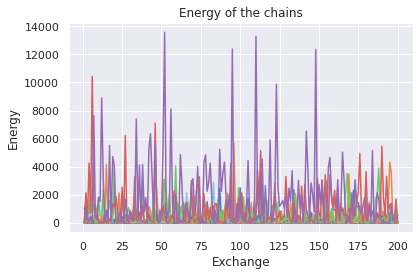

In [ ]:
ax=sns.lineplot(x="Exchange", y="E", hue="Replica", data=CAdE, legend=False,  palette="muted")
ax.set(xlabel="Exchange", ylabel = "Energy")
ax.set_title('Energy of the chains')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('PTCA2.png', dpi=450)

In [ ]:
x1= CAobs['theta1']
x2= CAobs['theta2']


In [ ]:
results=CAobs[[ 'theta1','theta2']]
results=pd.DataFrame.to_numpy(results) 
analysis=Analysis( results)
analysis

{'IAT': array([6626.3508284 , 3646.86218038]),
 'TotalObs': 270000,
 'Variance': array([ 5.95151917, 11.76073455]),
 'ess': array([40.74640884, 74.03624997]),
 'mVar': array([0.14606242, 0.15885103]),
 'mess': 40.746408844325316}

In [ ]:
size=analysis['TotalObs']
ws_t=weights( results, means= mu, size= size )
print('Average AFER: ', AFER(ws_t, 1/20))
print('Average # of Modes Discovered: ', np.sum(ws_t>0))


Average AFER:  0.44
Average # of Modes Discovered:  19


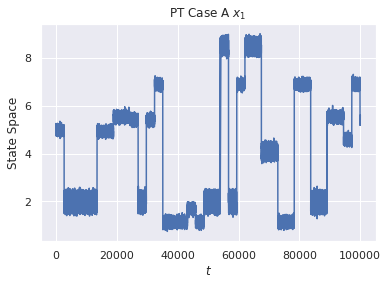

In [ ]:
sns.set()
plt.plot(results[0:100000,0])
plt.xlabel( r'$t$' )
plt.ylabel( 'State Space' )
plt.title( r'PT Case A '+r'$x_1$'  )
plt.savefig('traceplot-PTAx1.png', dpi=500)    
plt.show()

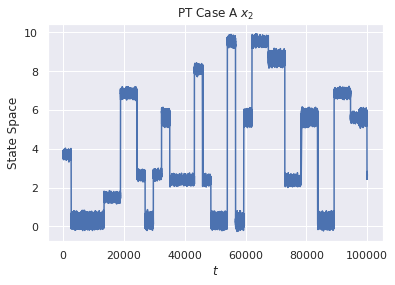

In [ ]:
sns.set()
plt.plot(results[0:100000,1])
plt.xlabel( r'$t$' )
plt.ylabel( 'State Space' )
plt.title( r'PT Case A '+r'$x_2$'  )
plt.savefig('traceplot-PTAx2.png', dpi=500)    
plt.show()

In [ ]:

xx,yy,Z= fpoints(f= logf ,args=(0,), theta=(), pars=(),
                  lb= np.array([0,0]), upb= np.array([10, 10]) , m=200 ) #takes time :)

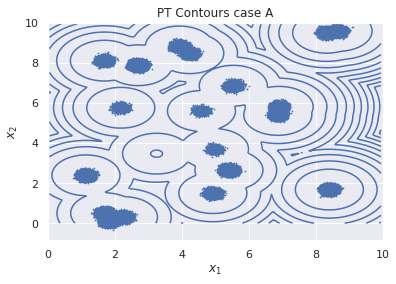

In [ ]:
sns.set()
plt.contour( xx, yy, -Z, 10, colors='b' )
plt.scatter( results[:, 0 ], results[:, 1 ], s=0.5 )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.title( r'PT Contours case A' )
plt.savefig('PTContoursA.png', dpi=500)    
plt.show()

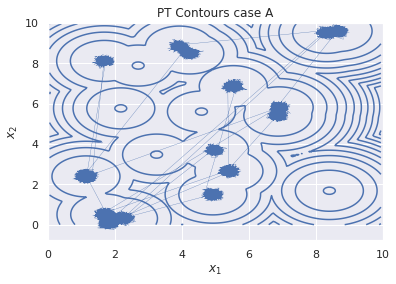

In [ ]:
sns.set()
plt.contour( xx, yy, -Z, 10, colors='b' )
plt.plot( results[0:75000, 0 ], results[0:75000, 1 ], linewidth=0.3 )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.title( r'PT Contours case A' )
plt.savefig('PTContoursAtrace3.png', dpi=500)    
plt.show()